## 2 - Data Processing & Feature Engineering

- loading the data from S3 bucket 
- Understand the data
- Clean the data
- EDA (Exploratory Data analysis) + Feature engineering

#### 2a - Extracting the Data from S3 Bucket

In [1]:
#use a library called boto3
import boto3
from botocore.exceptions import ClientError
import os
import sys
from io import StringIO

In [ ]:
# step 1 -  Defining all our parameters
bucket_name = "mo-churn-bucket"
s3_key = "raw/Telco-customers-churn.csv"

# step 2 - connect to S3
s3 = boto3.client("s3")

#step 3 - extract the data for the folder in s3 bucket
obj = s3.get_object(Bucket=bucket_name, Key=s3_key)

#step4 - load into dataframe (convert it into a pandas dataframe)
df = pd.read_csv(obj["Body"])

In [42]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2b - Understand the Data

In [43]:
# step 1 check the initial rows and columns
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
# step 2- check data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [45]:
# step 3 - describe the satistical summary of the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [46]:
# step 4 : check for problem in the data

# check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [47]:
# step 5 - check for duplicates
df.duplicated().sum()

np.int64(0)

#### 2c - Clean the data

In [48]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [50]:
# step 1 - check Totalcharges which is supoose to be a number not text 
df['TotalCharges'].dtype

# step 2 - convert the data type of TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# step 2b - checkinf or missing values in the column
df['TotalCharges'].isnull().sum()

# step 3  - fill missing values with the mean of the column
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())


## 3 - Exploratory Data Analysis

 - Exploring the data to derive meaningful insights from the data

 - 1 - understand the soltuion 
 - 2 - understand the Target variable 
 - 3 - numerical features analysis
 - 4 - categorical features (Non-numeric)
 - 5 - Bi-variate analysis (comparing the features with the target variable)
 - 6 - correlation analysis

### 3a - Understanding the solution 

- Churn prediction 
  - Assuming we have a business running , we have customers using our services or product 
  - For some reason customers are dissatified with our service
  - it means customers are churning or going to churn
  - we avoid by been able to predict the kind of customers that will churn 
  

In [51]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 3b - Understanding the Target variablea
 - the target variable is "Churn" column

Churn Distribution


Text(0.5, 0, 'Churn')

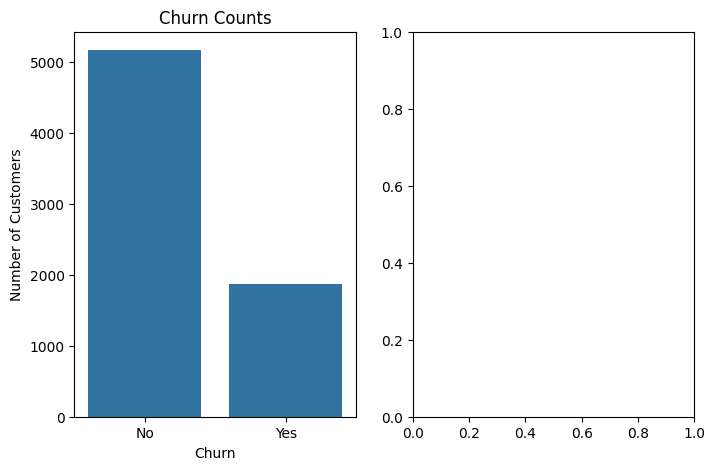

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# step 0 - we counted the values within our Churn column
print("Churn Distribution")
df['Churn'].value_counts()
df['Churn'].value_counts(normalize=True) * 100


# step 1 - defined a subplot & visualization size
fig , ax = plt.subplots(1,2, figsize=(8,5))

#step 2 - we need to know what values to put in out visualization
churn_counts = df['Churn'].value_counts()

# step 3 - we then plot the values (step 4 - we customize how the visualization should look like)
sns.barplot(x=churn_counts.index, y=churn_counts.values, ax=ax[0])
ax[0].set_title('Churn Counts')
ax[0].set_ylabel('Number of Customers')
ax[0].set_xlabel('Churn')


### 3c - Numerical Features Analysis

In [53]:
# step 1 - we checked the data for information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [54]:
# numerical columns in a list
numerical_cols  = ['tenure', 'MonthlyCharges', 'TotalCharges']

# step 2 - we needed to desctibe the numeric columns
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [55]:
# step 1 -  Bi-variate analysis (comparing 2 things together)

# picking each of the numerical features and comparing with the target variable ("churn")
target_variable = "churn"
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# we compare them by grouping them side-by-side (using a method called groupby in pandas)
df.groupby("Churn")[numerical_cols].mean().round(2)

,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.57,61.27,2554.77
Yes,17.98,74.44,1531.80


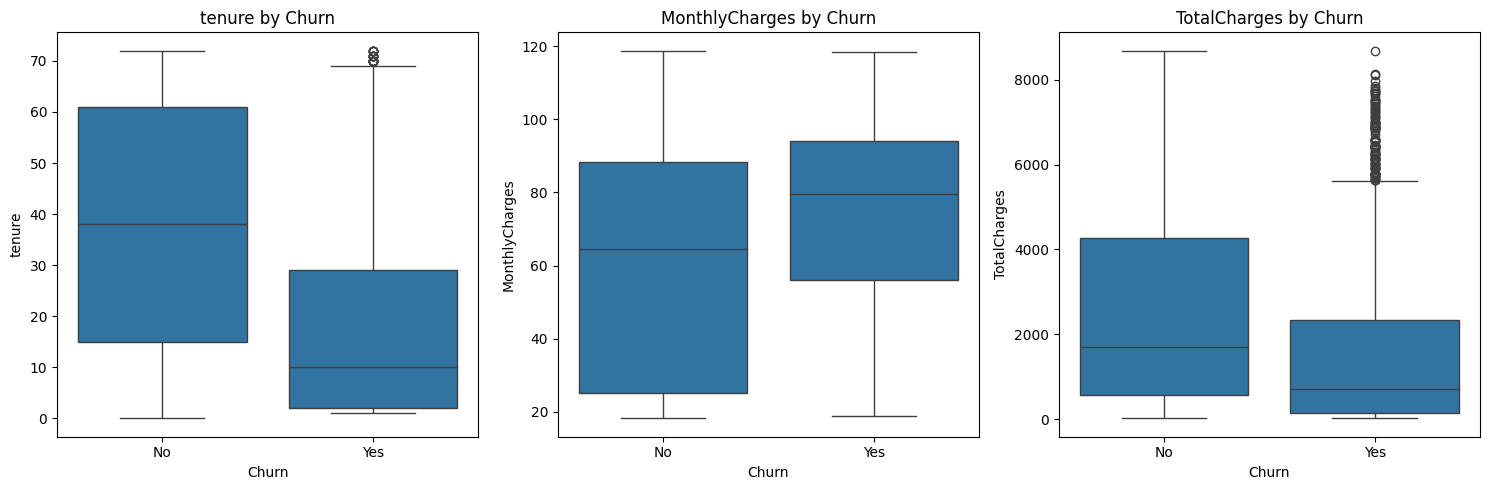

In [56]:
# step 2 - plotting the bi-variate analysis

import matplotlib.pyplot as plt
import seaborn as sns

# step 1 - defined the size of the visualization
fig, ax = plt.subplots(1,3, figsize=(15,5))

# step 2 - we loop through each of the numerical columns and plot them
for i, col in enumerate(numerical_cols):

    # step 3 - we plot each of the numerical columns against the target variable (churn)
    sns.boxplot(x="Churn", y=col, data=df, ax=ax[i])
    ax[i].set_title(f'{col} by Churn')
    ax[i].set_xlabel('Churn')
    ax[i].set_ylabel(col)
plt.tight_layout()
plt.show()



# 3d - Categorical features Analysis

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [58]:
# performing univariate analysis (looking at one variable at a time)

# STEP 1- checking the count and percentage of each category in the categorical columns

categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',]

# step 2 - loop through each of the categorical columns and print the value counts and percentages
for feature in categorical_cols:
    counts = df[feature].value_counts()
    percentages = df[feature].value_counts(normalize=True) * 100

    for category in counts.index:
        print(f"  {category}: {counts[category]} ({percentages[category]:1f}%)")

  Male: 3555 (50.475650%)
  Female: 3488 (49.524350%)
  0: 5901 (83.785319%)
  1: 1142 (16.214681%)
  No: 3641 (51.696720%)
  Yes: 3402 (48.303280%)
  No: 4933 (70.041176%)
  Yes: 2110 (29.958824%)
  Yes: 6361 (90.316626%)
  No: 682 (9.683374%)
  No: 3390 (48.132898%)
  Yes: 2971 (42.183729%)
  No phone service: 682 (9.683374%)
  Fiber optic: 3096 (43.958540%)
  DSL: 2421 (34.374556%)
  No: 1526 (21.666903%)
  No: 3498 (49.666335%)
  Yes: 2019 (28.666761%)
  No internet service: 1526 (21.666903%)
  No: 3088 (43.844952%)
  Yes: 2429 (34.488144%)
  No internet service: 1526 (21.666903%)


In [59]:
# step 3 - univariate analysit comparing categories and churn rates

target_variable = "Churn"
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',]

# step 4 - grouping each of the categorical columns with the target variable (churn)
for feature in categorical_cols:

    # step 5 - calculate the churn rate for each category (categorical column or feature) and group them 
    churn_rates = df.groupby(feature)[target_variable].value_counts(normalize=True).unstack()
    print(f"\nChurn Rates by {feature}:\n{churn_rates}\n")


Churn Rates by gender:
Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603


Churn Rates by SeniorCitizen:
Churn                No       Yes
SeniorCitizen                    
0              0.763938  0.236062
1              0.583187  0.416813




Churn Rates by Partner:
Churn          No       Yes
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649


Churn Rates by Dependents:
Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502


Churn Rates by PhoneService:
Churn               No       Yes
PhoneService                    
No            0.750733  0.249267
Yes           0.732904  0.267096


Churn Rates by MultipleLines:
Churn                   No       Yes
MultipleLines                       
No                0.749558  0.250442
No phone service  0.750733  0.249267
Yes               0.713901  0.286099


Churn Rates by InternetService:
Churn                  No       Yes
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050


Churn Rates by OnlineSecurity:
Churn                      No       Yes
OnlineSecurity                         
No 

# 4 - Correlation Analysis

In [60]:
# what is correlation?
# Correlation is a statistical measure that describes the extent to which two variables are related to each other. It quantifies the strength and direction of the relationship between the variables. Correlation is typically measured using a correlation coefficient, which ranges from -1 to +1.


In [61]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [62]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [63]:
#calculate the correlation matrix which works only for numerical columns

# step 1  - we noticed churn column is categorical so we convert it to numeric (correlation only works for numerical columns)
df['Churn_numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


# step 2 - define the correction matrix for all the numerical columns including the new churn_numeric column
correlation = df[[
    'tenure', 
    'MonthlyCharges', 
    'TotalCharges', 
    'Churn_numeric'
]].corr()['Churn_numeric'].sort_values(ascending=False)

print(correlation)

Churn_numeric     1.000000
MonthlyCharges    0.193356
TotalCharges     -0.199428
tenure           -0.352229
Name: Churn_numeric, dtype: float64


In [64]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_numeric
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


<Axes: >

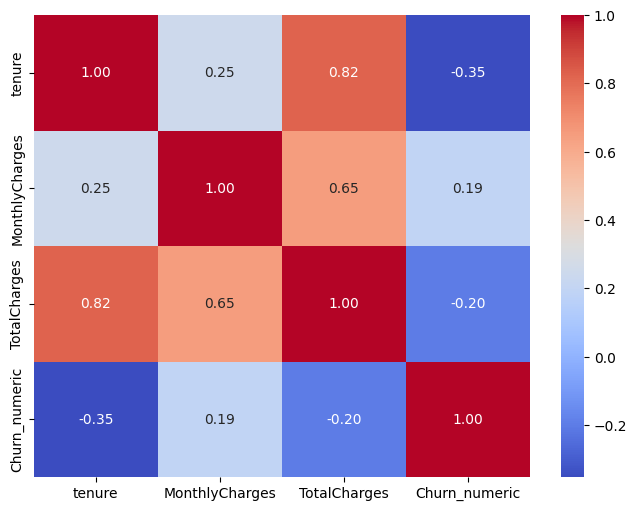

In [65]:
# let visualize the correlation using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# step 1 - define the size of the visualization
plt.figure(figsize=(8,6))

# step 2 - create the heatmap
sns.heatmap(df[[
    'tenure', 
    'MonthlyCharges', 
    'TotalCharges', 
    'Churn_numeric'
]].corr(), annot=True, cmap='coolwarm', fmt=".2f")

- MonthlyCharges (0.193) Slight positive correlation — customers with higher monthly charges are slightly more likely to churn.	

- TotalCharges (-0.199)	Slight negative correlation — customers with higher total charges (i.e., those who’ve paid more over time) are less likely to churn. This makes sense because these are usually long-term customers.	

- Tenure (-0.352)	Moderate negative correlation — customers with longer tenure are less likely to churn. In other words, newer customers churn more often.

# Feature Engineering

### whats feature engineering - enriching our dataset with extra informations thats likely going to help our models


In [66]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_numeric
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [67]:
# Monthly charge -- Average monthly charge a customer pays

df['MonthlyCharges_Average'] = df['MonthlyCharges'].astype(float).mean()

In [68]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_numeric,MonthlyCharges_Average
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,64.761692
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0,64.761692
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,64.761692
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,64.761692
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,64.761692


In [73]:
# convert Yes/No to 1/0 for some services

df["HasPhoneService"] = df["PhoneService"].apply(lambda x: 1 if x == "Yes" else 0)
df['IsSeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 1 if x == 1 else 0)
df['HasPartner'] = df['Partner'].apply(lambda x: 1 if x == "Yes" else 0)
df['HasDependents'] = df['Dependents'].apply(lambda x: 1 if x == "Yes" else 0)
df['HasSecurity'] = df['OnlineSecurity'].apply(lambda x: 1 if x == "Yes" else 0)

In [74]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,Churn_numeric,MonthlyCharges_Average,HasPhoneService,IsSeniorCitizen,HasPartner,HasDependents,HasSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,29.85,No,0,64.761692,0,0,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,56.95,1889.50,No,0,64.761692,1,0,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,53.85,108.15,Yes,1,64.761692,1,0,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,42.30,1840.75,No,0,64.761692,0,0,0,0,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,70.70,151.65,Yes,1,64.761692,1,0,0,0,0


# Save to S3

In [76]:
# save the processed data to a new CSV file
filename = "telco_churn_processed.csv"
df.to_csv(filename, index=False)

print(f"Processed data saved to {filename}")

Processed data saved to telco_churn_processed.csv


In [77]:
# upload the processed file to s3 bucket

# step 1- create s3 client
s3_client = boto3.client('s3')
bucket_name = "mo-churn-bucket"

# step 2 - upload the file
s3_client.upload_file(
    filename,
    bucket_name,
    'telco_churn_processed.csv'
)

print(f"Processed file uploaded to s3://{bucket_name}/telco_churn_processed.csv successfully")


Processed file uploaded to s3://mo-churn-bucket/telco_churn_processed.csv successfully
